<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 8: Analysis of Categorical Variables**

#### In this assignment you will learn about:

* Plots of Pearson’s χ2 (chi-squared) distributions
* Pearson’s χ2 test for one variable
* Contingency tables
* Fisher's Exact Test

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## Analysis of Categorical Variables

In this assignment, we discuss Pearson’s χ2 (chi-squared) test for testing hypotheses regarding the distribution of a categorical variable or the relationship between two categorical variables. 

Pearson’s test evaluates whether the probabilities for different categories are equal to the values specified by the null hypothesis. Although it is not necessary, we can think of the probability of each category as its population proportion. This makes the discussion easier to follow. 

For example, when we talk about the probability of heart attack survival being 0.7, we can interpret this as 70% of heart attack patients (i.e., 70% of the entire population of people suffered from heart attack) survive. As before, we use the sample proportion of each category as a point estimate for its probability (i.e., its population proportion).

Pearson’s  χ2 test uses a test statistic, which we denote as _Q_, to measure the discrepancy between the observed data and what we expect to observe nder the nullhypothesis (i.e., assuming the null hypothesis is true). Higher levels of discrepancy between data and H<sub>0</sub> results in higher values of _Q_. We use q to denote the observed value of Q based on a specific sample of observed data. As usual, we need to find the null distribution of Q (i.e., its sampling distribution assuming that H<sub>0</sub> is true) and measure the observed significance level pobs by calculating the probability of values as or more extreme than the observed value _q_.

### Example 1: Plot the PDF for a χ2 distribution with df = 1, 2 and 3 

One of the most notable aspects of the χ2 distribution is its marked dependence upon the the degrees of freedom (df). The df for a χ2 distribution depends upon the number of categorical variables involved in the analysis. One way to calculate the df is to create a contingency table and count the number of rows, and the number of columns. The df is the number of rows minus one times the number of columns minus one.   

In Example 1, we generate three different probability density functions (pdf) for a χ2 distributions with 1, 2 and 3 degrees of freedom. To do this we will use the Scipy stats function `chi2()`. The `chi2()` function computes the probability density of the a χ2 distribution with a given df. A `for` loop is used to print each curve separately. The `for loop` executes three times, one for each curve being plotted. 

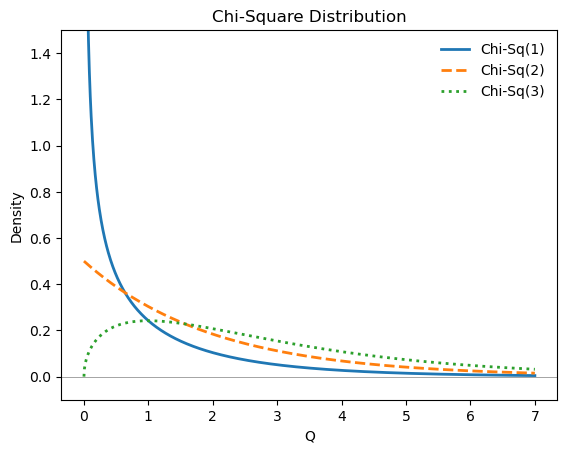

In [2]:
# Example 1: X2 Distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Specify values for variables
k = [1, 2, 3]  # Degrees of freedom
lineType = ['solid', 'dashed', 'dotted']  # Different line types
startX, endX = 0, 7  # Start and end of the x-axis
minY, maxY = -0.1, 1.5  # Min and max for the y-axis

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the 3 curves
for i in range(3):
    x_vals = np.linspace(startX, endX, 1000)
    y_vals = chi2.pdf(x_vals, df=k[i])
    ax.plot(x_vals, y_vals, label=f"Chi-Sq({k[i]})",
            linewidth=2, linestyle=f"{lineType[i]}")
    
# Set y limits
ax.set_ylim(minY,maxY)

# Add horizontal line
ax.axhline(y=0, linewidth=0.5, color="gray")

# Set labels and title
ax.set_xlabel("Q")
ax.set_ylabel("Density")
ax.set_title("Chi-Square Distribution")

# Add legend
ax.legend(loc="upper right", frameon=False)

# Show the plot
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image01.png)

By inspect of the graph above, we can see how important the degrees of freedom are in determining the shape of the Chi-square distribution. This graph is similar to **Fig. 10.1** on page 237 in your textbook. 

### **Exercise 1: Plot the PDF for a χ2 distribution with df = 4, 5 and 6** 

In the code cell below, write the Python code to plot the probability density function (pdf) for χ2 distributions with 4, 5 and 6 degrees of freedom. 

To make your plot look pleasing (and earn full credit), you will need to change the value of `endX` to equal 20 and the value of `maxY` to equal 0.2. 

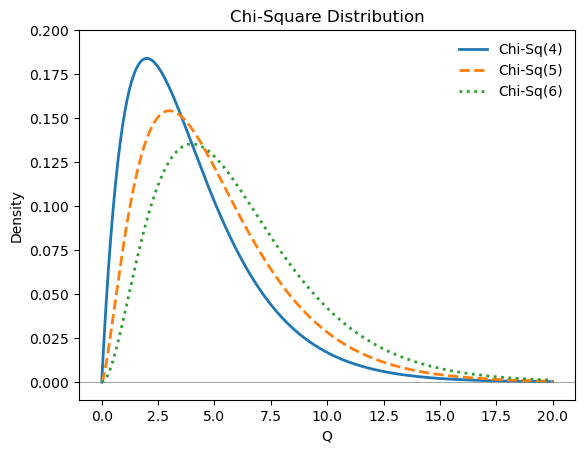

In [3]:
# Insert your code for Exercise 1 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Specify values for all of the variables
k = [4, 5, 6]  # Degrees of freedom
lineType = ['solid', 'dashed', 'dotted']  # Different line types
startX, endX = 0, 20  # Start and end of the x-axis
minY, maxY = -0.01, 0.2  # Min and max for the y-axis

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the 3 curves
for i in range(3):
    x_vals = np.linspace(startX, endX, 1000)
    y_vals = chi2.pdf(x_vals, df=k[i])
    ax.plot(x_vals, y_vals, label=f"Chi-Sq({k[i]})",
            linewidth=2, linestyle=f"{lineType[i]}")
    
# Set y limits
ax.set_ylim(minY,maxY)

# Add horizontal line
ax.axhline(y=0, linewidth=0.5, color="gray")

# Set labels and title
ax.set_xlabel("Q")
ax.set_ylabel("Density")
ax.set_title("Chi-Square Distribution")

# Add legend
ax.legend(loc="upper right", frameon=False)

# Show the plot
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image02.png)

As df increases, the χ2 distribution looks more and more like a "bell-shape" curve (normal distribution).

## **Pearson’s χ2 Test for One Categorical Variable**

### _Binary Variables_

We start our discussion of Pearson’s method by focusing on binary random variables first. Then, we show how we can extend this approach for situations where categorical variables have more than two possible values. 

Let us denote the binary variable of interest as _X_, based on which we can divide the population into two groups depending on whether _X_ = 1 or _X_ = 0. Further, suppose that the null hypothesis H<sub>0</sub> states that the probability of group 1 (i.e., the probability that an individual belongs to the group 1) is _μ_<sub>01</sub> and the probability of group 2 is _μ_<sub>02</sub>. Of course, because the sum of probabilities adds up to one, _μ_<sub>02</sub> = 1−_μ_<sub>01</sub>. 

As a running example, we use the heart attack survival rate (i.e., the probability of survival after heart attack) within one year after hospitalization. Suppose that _H_<sub>0</sub> specifies that the probability of surviving is _μ_<sub>01</sub> = 0.70 and the probability of not surviving is _μ_<sub>02</sub> = 0.30. 

If we take a random sample of size _n_ = 40 from the population (people who suffer from heart attack), we expect that 70% of them survive and 30% of them die within one year from the time of hospitalization if in fact the null hypothesis is true. That is, we expect that 0.70×40 = 28 of subjects belong to the first group (survived) and 0.30×40 = 12 of subjects belong to the second group (nonsurvived).

### Data Description

For the next examples and exercises, we will use the Birth Weight dataset that was collected at Baystate Medical Center, Springfield, Mass during 1986.

![__](https://biologicslab.co/STA1403/images/BaystateMedCtr.jpg)

The dataset contains data from 189 women who gave birth to a baby at the medical center. For each woman, the following 10 datapoints were recorded: 

* _low_   indicator of birth weight less than 2.5 kg.
* _age_   mother's age in years.
* _lwt_   mother's weight in pounds at last menstrual period.
* _race_  other's race (1 = white, 2 = black, 3 = other).
* _smoke_ smoking status during pregnancy.
* _ptl_   number of previous premature labours.
* _ht_    history of hypertension.
* _ui_    presence of uterine irritability.
* _ftv_   number of physician visits during the first trimester.
* _bwt_   birth weight in grams.



### Read datafile from the internet. 

We will use the Pandas function `pd.read_csv()` function to read the data from the course file server, `biologicslab.co`. In this text file, data values are separated by a space. Therefore, we have to add the argument `sep=' '` as shown in the cell below. As the data is stored in a DataFrame called `bwDF`. 

After reading in the data, we use the `head()` function to print out the first 5 records to make sure our code worked as expected.

In [4]:
# Read in the data 
import pandas as pd

# Read data file
bwDF = pd.read_csv("https://biologicslab.co/STA1403/data/birthwt.txt", 
                   sep=' ')  # define the separator as a space

# Print out the first 6 values.
bwDF.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image03.png)

The output from `wtDF.head()` shows first 5 records in the DataFrame `bwDF`. You can see that the values line-up nicely under the row headers indicating that the text file was read correctly. Whenever the values don't line-up nicely, it probably means you specified the separation character incorrectly.

### Example 2: Generate a 2 X 2 contingency table of _low_ by _smoke_

In the cell below, we use the Pandas function `pd.crosstab()` generate a 2 X 2 contingency table, or cross tabulation, of _low_ by _smoke_ from the `bwDF` DataFrame. In this example, the category `smoke` is used as the **_index_** while the category 'low` is used as the **_columns_**. The function allows us to specify what label we want for the index (row) and columns.

In [5]:
# Example 2: Contingency table

import pandas as pd

# Create cross tabulation 
C_tab1 = pd.crosstab(index=bwDF['smoke'], columns=bwDF['low'], 
                     rownames=["Mother Smoked"], 
                     colnames=["Low Birth Weight"])

# Print out table
print(C_tab1)

Low Birth Weight   0   1
Mother Smoked           
0                 86  29
1                 44  30


If the code is correct, you should see the following contingency table:
~~~text
Low Birth Weight   0   1
Mother Smoked           
0                 86  29
1                 44  30
~~~

### **Exercise 2: Generate 2 X 2 contingency table of _low_ by _ui_**

In the cell below, write the Python code to generate a 2 X 2 contingency table of low birth weight (`low`) by uterine irritability (`ui`). Make sure that low birth weight is the index (row variable) and uterine irritability is the column variable. 

In [6]:
# Example 2: Contingency table



If the code is correct, you should see the following contingency table:
~~~text
Low Birth Weight   0   1
Mother Smoked           
0                 86  29
1                 44  30
~~~

### Example 3: Perform χ2 test of _low_ by _smoke_

The cell below shows the Python code to how to perform a Pearson's Chi-squared (χ2) test on low birthweight (_low_) vs maternal smoking behavior (_smoke_). 

This test starts by creating a cross tabulation table called `observed_table`, with `smoke` as the index and `low` as the columns. This table is then used with the Scipy Stats function `chi2_contingency()` function. 

is performed using R's `chisq.test()` function. The order in which the two variables are past to the function `chisq.test` is not important, so the same results will be returned whichever order is choosen. The argument `correct = FALSE` tells the function to **_not_** apply the Yates continuity function.   

In [7]:
# Example 3: Chi-square analysis

import numpy as np
from scipy.stats import chi2_contingency

# Create cross tabulation
observed_table = pd.crosstab(index=bwDF['smoke'], columns=bwDF['low'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected_table = chi2_contingency(observed_table, correction=True)

# Print out the results
print(f"Chi-squared statistic: {chi2_stat:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected_table)

Chi-squared statistic: 4.235929
P-value: 0.039577
Degrees of freedom: 1
Expected frequencies:
[[79.1005291 35.8994709]
 [50.8994709 23.1005291]]


If the code is correct, you should see the following table:
~~~text
Chi-squared statistic: 4.235929
P-value: 0.039577
Degrees of freedom: 1
Expected frequencies:
[[79.1005291 35.8994709]
 [50.8994709 23.1005291]]
~~~

### Data Interpretation

First, let's check that our function, `chi2_contingency()` calculated the correct degrees of freedom. The output says that `Degrees of freedom: 1` and this is correct. The 2 X 2 contingency table generated in Example 2 had two rows and two columns. Using our formula for calculating degrees of freedom, the number of rows minus 1, times the number of columns minus 1, we get (2-1) X (2-1) = 1.

When using the χ2 test in this example, our null hypothesis is that low birth weight and maternal smoking behavior are **_independent_** of each other. In other words, whether a mother smokes, or not, has no effect on the birthweight of her baby.  

When applying the `chi2_contingency()` function, the parameter `correction` was set to `True`. When `correction=True`, and the degrees of freedom is 1, this applies Yates’ correction for continuity. The effect of the correction is to adjust each observed value by 0.5 towards the corresponding expected value. 

The test statistic, `X-squared`, equals 4.235929. Remember, the larger the value of the test statistic, the more **_unlikely_** the difference between the expected and the observed results were simply due to random chance. 

In this instance, the difference is fairly large. The p-value = 0.039577 is _smaller_ that 95% confidence level of 0.05. Therefore, you should **_reject the null hypothesis  _H_<sub>0</sub>:** that the smoking behavior of mothers and the birthweight of their baby are independent of each other. Therefore we are forced to  **accept the alternative hypothesis, _H_<sub>A</sub>:**, that maternal smoking behavior and birthweight are some how linked.  

### **Exercise 3: Perform χ2 test of   _low_ by _ui_**

In the cell below, write the Python code to perform a χ2 test of low birth weight (_low_) by utrine irritability (_ui_).   

In [8]:
# Insert your code for Exercise 3 here



If your code is correct, you should see the following table:
~~~text
Chi-squared statistic: 4.422673
P-value: 0.035464
Degrees of freedom: 1
Expected frequencies:
[[110.74074074  19.25925926]
 [ 50.25925926   8.74074074]]
~~~

Again, the p-value: 0.035 is less than 0.05 meaning a statistically significant result suggesting that low birth weight and uterine irritability are somehow interrelated. 

### Example 4: Fisher's Exact Test for _low_ by _smoke_

Example 4 shows the Python code to perform Fisher' Exact Test for low birth weight (_low_) as a function of smoking behavior of the mother (_smoke_). 

Fisher’s Exact Test is used to determine whether or not there is a significant association between two categorical variables. It is typically used as an alternative to the Chi-Square Test of Independence when one or more of the cell counts in a 2×2 table is less than 5. In this example, we will use Scipy Stat's  `fisher_exact()` function. 

In [9]:
# Example 4: Fisher Exact Test

import pandas as pd
from scipy.stats import fisher_exact

# Create contingency table
observed_table = pd.crosstab(index=bwDF['smoke'], columns=bwDF['low'])

# Perform the Fisher’s exact test
odds_ratio, p_value = fisher_exact(observed_table)

# Print out the results
print(f"Odds ratio: {odds_ratio:.6f}")
print(f"P-value: {p_value:.6f}")

Odds ratio: 2.021944
P-value: 0.036176


If your code is correct, you should see the following table:
~~~text
Odds ratio: 2.021944
P-value: 0.036176
~~~

### Data Interpretation

Since the number of counts in our 2 X 2 Contingency table generated above in Example 1, were all larger than 5, there would no need to analyze these data using Fisher's Exact Test, instead of the more usual χ2 test. On the other hand, we should expect that the results of both tests should be similar, if not identical.

In the χ2 test of these data performed in Example 3, the p-value = 0.039577 while the Fisher Exact Test gave an almost identical p-value = 0.03618 when the Yates Continuity Correction turned on.

So what's the difference between the χ2 test and Fisher's Exact Test?

The main difference is that χ2 test applies an **_approximation_** that assumes the sample size is large, while the Fisher's Exact Test runs an **_exact_** procedure, that is especially valuable for small-sized samples. In other words, there are no approximations made, _every_ possible solution is analysed. 

So if the Fisher's Exact Test is "better", why do statisticians bother using the χ2 test? Basically, the χ2 test takes less "computational power" because of the approximations so it was easier to perform manually before personal computers became relatively cheap, powerful and abundant. 

### **Exercise 4: Fisher's Exact Test for _low_ by _ui_</u>**

Perform Fisher' Exact Test for low birth weight as a function of uterine irritability.

In [10]:
# Insert your code for Exercise 4 here



If your code is correct, you should see the following table:
~~~text
Odds ratio: 2.577778
P-value: 0.026918
~~~

### **Lesson Turn-In**

When you have completed all of the exercises and run **every** cell in this Lesson, print out a PDF copy and upload it to Canvas. Your PDF should be called `Assignment_08_lastname.pdf` where _Lastname_ is your last name.